In [0]:
import re
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import urllib.request

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/Franck-Dernoncourt/NeuroNER/master/neuroner/data/conll2003/en/train.txt", filename="train.txt")

('train.txt', <http.client.HTTPMessage at 0x7f43f17587f0>)

In [0]:
f = open('train.txt')
tagged_sentences = []
sentence = []

for line in f:
  if len(line) == 0 or line.startswith('-DOCSTART') or line[0] == '\n':
    if len(sentence) > 0:
      tagged_sentences.append(sentence)
      sentence = []
    continue
  
  splits = line.split(' ')
  splits[-1] = re.sub(r'\n', '', splits[-1])
  word = splits[0].lower()
  sentence.append([word, splits[-1]])

In [15]:
len(tagged_sentences)

14041

In [17]:
tagged_sentences[3]

[['the', 'O'],
 ['european', 'B-ORG'],
 ['commission', 'I-ORG'],
 ['said', 'O'],
 ['on', 'O'],
 ['thursday', 'O'],
 ['it', 'O'],
 ['disagreed', 'O'],
 ['with', 'O'],
 ['german', 'B-MISC'],
 ['advice', 'O'],
 ['to', 'O'],
 ['consumers', 'O'],
 ['to', 'O'],
 ['shun', 'O'],
 ['british', 'B-MISC'],
 ['lamb', 'O'],
 ['until', 'O'],
 ['scientists', 'O'],
 ['determine', 'O'],
 ['whether', 'O'],
 ['mad', 'O'],
 ['cow', 'O'],
 ['disease', 'O'],
 ['can', 'O'],
 ['be', 'O'],
 ['transmitted', 'O'],
 ['to', 'O'],
 ['sheep', 'O'],
 ['.', 'O']]

In [0]:
sentences, ner_tags = [], []
for tagged_sentence in tagged_sentences:
  sentence, tag_info = zip(*tagged_sentence)
  sentences.append(list(sentence))
  ner_tags.append(list(tag_info))

In [19]:
print(sentences[0])
print(ner_tags[0])

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


샘플의 최대 길이 : 113
샘플의 평균 길이 : 14.501887


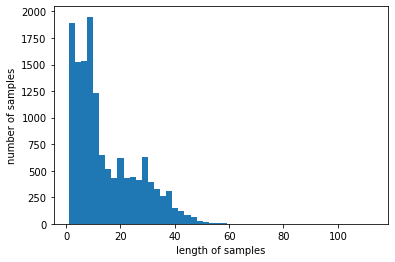

In [20]:
print('샘플의 최대 길이 : %d'%max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f'%(sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [0]:
max_words = 4000
src_tokenizer = Tokenizer(num_words=max_words, oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)

In [22]:
vocab_size = max_words
tag_size = len(tar_tokenizer.word_index)+1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태딩 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 4000
개체명 태딩 정보 집합의 크기 : 10


In [0]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [53]:
print(X_train[0])
print(y_train[0])

[989, 1, 205, 629, 7, 3939, 216, 1, 3]
[4, 1, 7, 1, 1, 1, 7, 1, 1]


In [0]:
index_to_word =src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

In [55]:
index_to_word

{1: 'OOV',
 2: 'the',
 3: '.',
 4: ',',
 5: 'of',
 6: 'in',
 7: 'to',
 8: 'a',
 9: 'and',
 10: '(',
 11: ')',
 12: '"',
 13: 'on',
 14: 'said',
 15: "'s",
 16: 'for',
 17: '1',
 18: '-',
 19: 'at',
 20: 'was',
 21: '2',
 22: '0',
 23: '3',
 24: 'with',
 25: 'that',
 26: 'he',
 27: 'from',
 28: 'it',
 29: 'by',
 30: 'is',
 31: ':',
 32: 'as',
 33: '4',
 34: 'had',
 35: 'his',
 36: 'has',
 37: 'but',
 38: 'an',
 39: 'not',
 40: 'were',
 41: 'be',
 42: 'after',
 43: 'have',
 44: 'first',
 45: 'new',
 46: 'who',
 47: 'will',
 48: 'they',
 49: '5',
 50: 'two',
 51: 'u.s.',
 52: 'been',
 53: '$',
 54: '--',
 55: 'their',
 56: 'beat',
 57: 'are',
 58: '6',
 59: 'which',
 60: 'would',
 61: 'this',
 62: 'up',
 63: 'its',
 64: 'year',
 65: 'i',
 66: 'last',
 67: 'percent',
 68: 'out',
 69: 'we',
 70: 'thursday',
 71: 'one',
 72: 'million',
 73: 'over',
 74: 'government',
 75: 'wednesday',
 76: 'police',
 77: '7',
 78: 'results',
 79: 'against',
 80: 'second',
 81: 'when',
 82: '/',
 83: 'also',


In [56]:
decoded = []
for index in X_train[0]:
  decoded.append(index_to_word[index])

print('기존 문장 : {}'.format(sentences[0]))
print('빈도수가 낮은 단어가 OOV 처리된 문장 : {}'.format(decoded))

기존 문장 : ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
빈도수가 낮은 단어가 OOV 처리된 문장 : ['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']


In [57]:
X_train[0]

[989, 1, 205, 629, 7, 3939, 216, 1, 3]

In [0]:
max_len = 70
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len) 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

In [0]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [61]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (11232, 70)
훈련 샘플 레이블의 크기 : (11232, 70, 10)
테스트 샘플 문장의 크기 : (2809, 70)
테스트 샘플 레이블의 크기 : (2809, 70, 10)


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [64]:
model.fit(X_train, y_train, batch_size=128, epochs=8,  validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 11232 samples, validate on 2809 samples
Epoch 1/8
11232/11232 [==============================] - 148s 13ms/step - loss: 0.1897 - accuracy: 0.8229 - val_loss: 0.1291 - val_accuracy: 0.8321
Epoch 2/8
11232/11232 [==============================] - 148s 13ms/step - loss: 0.1016 - accuracy: 0.8538 - val_loss: 0.0787 - val_accuracy: 0.8810
Epoch 3/8
11232/11232 [==============================] - 148s 13ms/step - loss: 0.0675 - accuracy: 0.9022 - val_loss: 0.0545 - val_accuracy: 0.9201
Epoch 4/8
11232/11232 [==============================] - 150s 13ms/step - loss: 0.0471 - accuracy: 0.9337 - val_loss: 0.0437 - val_accuracy: 0.9400
Epoch 5/8
11232/11232 [==============================] - 145s 13ms/step - loss: 0.0368 - accuracy: 0.9483 - val_loss: 0.0368 - val_accuracy: 0.9488
Epoch 6/8
11232/11232 [==============================] - 145s 13ms/step - loss: 0.0307 - accuracy: 0.9566 - val_loss: 0.0340 - val_accuracy: 0.9534
Epoch 7/8
11232/11232 [==============================] - 143s 1

In [66]:
index_to_word=src_tokenizer.index_word
index_to_tag=tar_tokenizer.index_word

i=10 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_tag[t].upper(), index_to_tag[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
sarah            : B-PER   B-PER
brady            : I-PER   I-PER
,                : O       O
whose            : O       O
republican       : B-MISC  B-MISC
husband          : O       O
was              : O       O
OOV              : O       O
OOV              : O       O
in               : O       O
an               : O       O
OOV              : O       O
attempt          : O       O
on               : O       O
president        : O       O
ronald           : B-PER   B-PER
reagan           : I-PER   I-PER
,                : O       O
took             : O       O
centre           : O       O
stage            : O       O
at               : O       O
the              : O       O
democratic       : B-MISC  B-MISC
national         : I-MISC  I-MISC
convention       : I-MISC  O
on               : O       O
monday           : O       O
night            : O       O
to               : O       O
OOV              : O       O
presiden